# Building a binary classifier 

**Name: Dahye Kim (김다혜)**  
**ID: 20153712**  
**Date: 22 November 2018**  
**Project Github:** https://github.com/joyfuldahye/MFCVML_Assignments/tree/master/Assignment08  

**Requirements** 

* Define a linear bi-partitioning function $\tilde{f}$ to classify digit ’0’ against all the other digits ’1’, ’2’, ’3’, ’4’, ’5’, ’6’, ’7’, ’8’, ’9’ using the training data at MNIST dataset
* Define the classifier $\hat{f}(x) = sign(\tilde{f}(x))$ using the sign function:

$sign(x) =   \begin{cases}
    +1       & \quad \text{if } x \geq0\\
    -1  & \quad \text{if } x \text{ < 0}
  \end{cases}$

* Evaluate the performance of the classifier $\hat{f}$ using the testing data at MNIST dataset based on TP(True Positive), FP(False Positive), TN(True Negative) and FN(False Negative)

* Let $x = (x_1, x_2, ..., x_{784})$ be a vector that represent an image of the size 28 x 28
* Let $f_i$ be a feature function such that $f_i:\mathbb{R}^{784} \to \mathbb{R}:$  
$f_i(x) = x_i$  
* The partitioning function $\tilde{f}: \mathbb{R}^{784} \to \mathbb{R}$ is defined by:  
$\tilde{f}(x;\theta)=\theta_1f_1(x)+\theta_2f_2(x)+...+\theta_{784}f_{784}(x)$ 
    where $\theta = (\theta_1, \theta_2,...,\theta_{784})$ denotes the model parameters

**Essential Visualisation**

* Plot the value of the model parameters $\theta_1, \theta_2,...,\theta_{784}$ in the image form (28 x 28)
* Present the evaluation value table (TP, FP, TN, FN)
* Plot the average image (28 x 28) of True Positive
* Plot the average image (28 x 28) of False Positive
* Plot the average image (28 x 28) of True Negative
* Plot the average image (28 x 28) of False Negative

-----------------------------------------------------------------------

## Import libraries and define variables

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from copy import deepcopy

## Define data loader class for MNIST

In [2]:
# mnist data loader
class MnistDataLoader(object):
    def __init__(self, file_data_train, file_data_test, size_row=28, size_col=28):
        h_data_train    = open(file_data_train, "r")
        h_data_test     = open(file_data_test, "r")
        
        # raw data
        self.data_train = h_data_train.readlines()
        self.data_test = h_data_test.readlines()
        self.num_train   = len(self.data_train)   # number of training images
        self.num_test    = len(self.data_test)    # number of testing images
        h_data_train.close()
        h_data_test.close()
        
        # info data 
        self.size_row = size_row
        self.size_col = size_col
        self.data_length = self.size_row * self.size_col
        
        # preprocessing data
        self.list_image_train    = np.empty((self.size_row * self.size_col, self.num_train), dtype=float)
        self.list_label_train    = np.empty(self.num_train, dtype=int)

        self.list_image_test     = np.empty((self.size_row * self.size_col, self.num_test), dtype=float)
        self.list_label_test     = np.empty(self.num_test, dtype=int)
        
        self.preprocess_data()

    def normalize(self, data):
        data_normalized = (data - min(data)) / (max(data) - min(data))
        return(data_normalized)
        
    def preprocess_data(self):
        for count, line in enumerate(self.data_train):
            line_data   = line.split(',')
            label       = line_data[0]
            im_vector   = np.asfarray(line_data[1:])
            im_vector   = self.normalize(im_vector)

            self.list_label_train[count]     = label
            self.list_image_train[:, count]  = im_vector    

        for count, line in enumerate(self.data_test):
            line_data   = line.split(',')
            label       = line_data[0]
            im_vector   = np.asfarray(line_data[1:])
            im_vector   = self.normalize(im_vector)

            self.list_label_test[count]      = label
            self.list_image_test[:, count]   = im_vector    

## Define a bi-classifier class to detect '0' with sign function


* **Initialisation**
  * set learning rate
  * randomly initailse the first model parameters

* **Predict with sign function**
  * $sign(x) =   \begin{cases}
    +1       & \quad \text{if } x \geq0\\
    -1  & \quad \text{if } x \text{ < 0}
  \end{cases}$
* **Update model parameters**
  * $\theta =   \begin{cases}
    \theta + (1 * \alpha)       & \quad \text{if } \hat{f}(x) = -1 but\space y = 1 \geq0\\
     \theta + (-1 * \alpha)  & \quad \text{if }  \hat{f}(x) = 1 but\space y = -1
  \end{cases}$
    * where $\alpha = learning\space rate$

In [3]:
# classifier using sign function
class BinaryClassifier(object):
    def __init__(self, num_parameter, learning_rate):
        self.num_parameter = num_parameter
        self.learning_rate = learning_rate
        
        # init the model parameters (randomly)
        self.model_parameters = []
        for i in range(self.num_parameter):
            self.model_parameters.append(np.random.uniform(-1, 1))

    def predict(self, x):
        if np.sum(x * self.model_parameters) >= 0:
            return 1
        else:
            return -1
            
    def update_model_parameters(self, x, y):
        if self.predict(x) != y: # if prediction is false
            if y == 1: # when false negative
                for j in range(len(x)):
                    change = (1 * self.learning_rate * x[j])
                    new_parameter = (self.model_parameters[j] + change)
                    self.model_parameters[j] = new_parameter
            else: # when false positive
                for j in range(len(x)):
                    change = (-1 * self.learning_rate * x[j])
                    new_parameter = self.model_parameters[j] + change
                    self.model_parameters[j] = new_parameter
        else:
            self.model_parameters = self.model_parameters

    def plot_parameters(self, epoch, size_row, size_col):
        self.parameters_image = np.asarray(self.model_parameters)
        plt.imshow(self.parameters_image.reshape((size_row, size_col)), cmap='Greys', interpolation='None')
        frame   = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)
        plt.title(f'Epoch{epoch}: model Parameters')
        plt.show()

## Define a trainer class with sign function  
* **Initialisation**  
  * Assign new labels to train and test images $if\space0 \to 1,$ $if \space not\space 0 \to -1$
* **Train**  
  * Execute prediction and update model parameters as much as given epoch

In [4]:
class TrainerWithSign(object):
    def __init__(self, classifier, data_loader):
        self.classifier = classifier
        self.data_loader = deepcopy(data_loader)
        self.prediction_result_train = []
        
        # change train label 
        for i, train_label in enumerate(self.data_loader.list_label_train):
            if train_label == 0:
                self.data_loader.list_label_train[i] = 1
            else:
                self.data_loader.list_label_train[i] = -1
        
        
        # change test label
        for i, test_label in enumerate(self.data_loader.list_label_test):
            if test_label == 0:
                self.data_loader.list_label_test[i] = 1
            else:
                self.data_loader.list_label_test[i] = -1
        
        
    def train(self, num_epoch):
        for e in range(num_epoch):
            self.prediction_result_train = []
            num_collect = 0
            for i in range(self.data_loader.num_train):
                x = self.data_loader.list_image_train[:, i]
                y = self.data_loader.list_label_train[i]
                pred = self.classifier.predict(x)
                self.prediction_result_train.append(pred)
                
                if y == pred:
                    num_collect += 1
                
                self.classifier.update_model_parameters(
                    x,
                    y
                )
        
            print('Epoch=%d, Accuracy=%.2f' % (e, num_collect / self.data_loader.num_train))
            self.classifier.plot_parameters(e, 28, 28)

## Define a polt and analyse class

In [5]:
class PlotterAndAnalyser(object):
    def __init__(self, data_loader):
        self.data_loader = data_loader
        
        # initialise vectors for result images
        self.im_average  = np.zeros((self.data_loader.size_row * self.data_loader.size_col, 4), dtype=float)
        self.im_count    = np.zeros(4, dtype=int)

        
        
    def plot_classified_result(self, num_data, list_label_data, partition_result, list_image_data):
        for i in range(num_data):
            if list_label_data[i] == 1 and partition_result[i] == 1: # true positive
                self.im_average[:, 0] += list_image_data[:, i]
                self.im_count[0] += 1
            elif list_label_data[i] == -1 and partition_result[i] == -1: # true negative
                self.im_average[:, 1] += list_image_data[:, i]
                self.im_count[1] += 1
            elif list_label_data[i] == -1 and partition_result[i] == 1: # false positive
                self.im_average[:, 2] += list_image_data[:, i]
                self.im_count[2] += 1
            elif list_label_data[i] == 1 and partition_result[i] == -1: # false negative
                self.im_average[:, 3] += list_image_data[:, i]
                self.im_count[3] += 1

        titles = ['True Positive', 'True Negative', 'False Positive', 'False Negative']

        for i in range(4):

            self.im_average[:, i] /= self.im_count[i]

            plt.subplot(2, 2, i+1)
            plt.title(titles[i])
            plt.imshow(self.im_average[:,i].reshape((self.data_loader.size_row, self.data_loader.size_col)), cmap='Greys', interpolation='None') 

            frame   = plt.gca()
            frame.axes.get_xaxis().set_visible(False)
            frame.axes.get_yaxis().set_visible(False)
        plt.show()
    
    def plot_evaluation_table(self):
        column_list = ['Positive', 'Negative', 'Total']
        row_list = ['True', 'False', 'All']
        self.num_true_positive =  self.im_count[0]
        self.num_true_negative =  self.im_count[1]
        self.num_false_positive =  self.im_count[2]
        self.num_false_negative =  self.im_count[3]
        self.total_positive = self.num_true_positive + self.num_false_positive
        self.total_negative = self.num_true_negative + self.num_false_negative
        self.total_true =  self.num_true_positive + self.num_true_negative
        self.total_false = self.num_false_positive + self.num_false_negative
        self.total_all = self.total_true + self.total_false
        self.total = [self.total_true, self.total_false, self.total_all]
        self.positives = [self.num_true_positive, self.num_false_positive, self.total_positive]
        self.negatives = [self.num_true_negative, self.num_false_negative, self.total_negative]

        evaluation_table = pd.DataFrame({'positive': self.positives,
                          'negative': self.negatives,
                          'Total': self.total})
        evaluation_table.rename(index={0:'True', 1:'False', 2:'All'}, inplace=True)
        return evaluation_table
    
    def plot_scores(self):
        column_list = ['Precision', 'Recall']
        self.precision = self.num_true_positive / (self.num_true_positive + self.num_false_positive)
        self.recall = self.num_true_positive / (self.num_true_positive + self.num_false_negative)
        
        scores = pd.Series({'Precision': self.precision, 'Recall': self.recall})
        return scores
    

## Execute train with training data
* set learning rate = 0.00001
* epoch: 20

Epoch=0, Accuracy=0.63


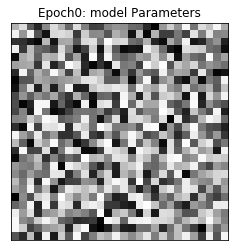

Epoch=1, Accuracy=0.81


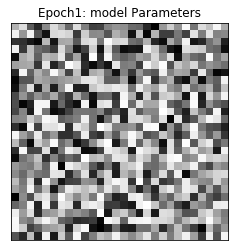

Epoch=2, Accuracy=0.84


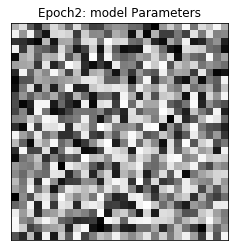

Epoch=3, Accuracy=0.86


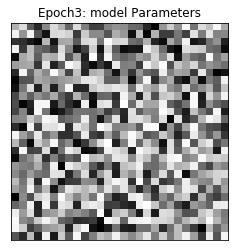

Epoch=4, Accuracy=0.88


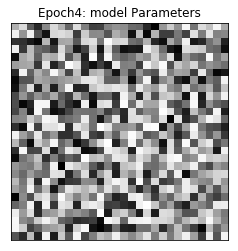

Epoch=5, Accuracy=0.89


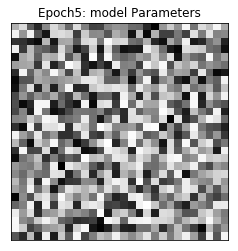

Epoch=6, Accuracy=0.89


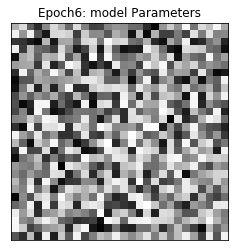

Epoch=7, Accuracy=0.90


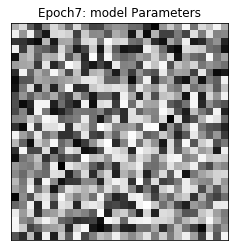

Epoch=8, Accuracy=0.91


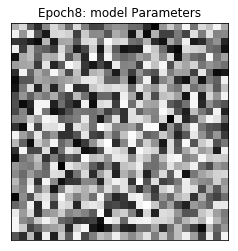

Epoch=9, Accuracy=0.91


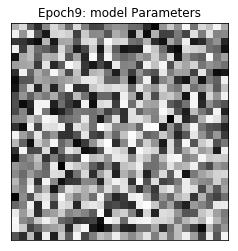

Epoch=10, Accuracy=0.92


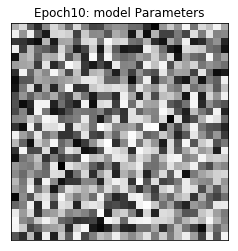

Epoch=11, Accuracy=0.92


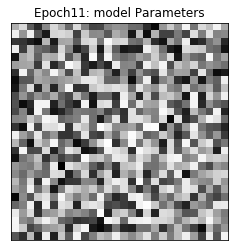

Epoch=12, Accuracy=0.92


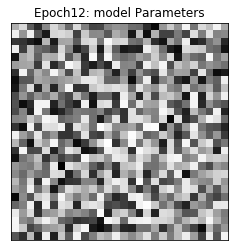

Epoch=13, Accuracy=0.93


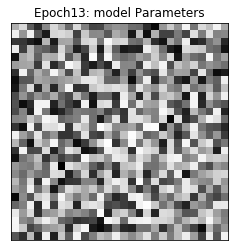

Epoch=14, Accuracy=0.93


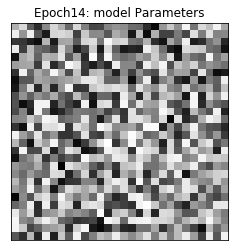

Epoch=15, Accuracy=0.93


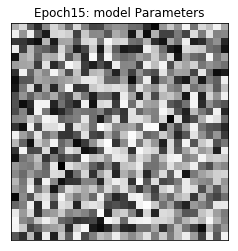

Epoch=16, Accuracy=0.93


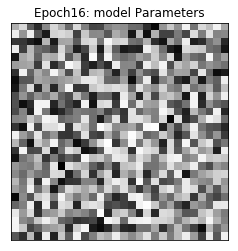

Epoch=17, Accuracy=0.94


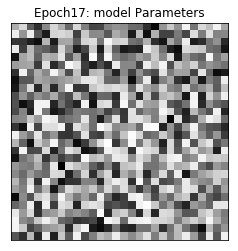

Epoch=18, Accuracy=0.94


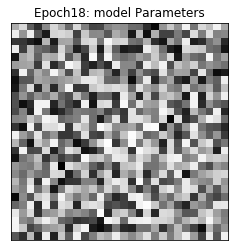

Epoch=19, Accuracy=0.94


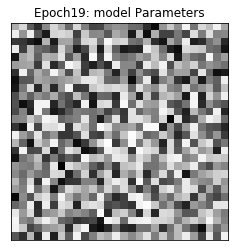

In [6]:
mnist_data_loader = MnistDataLoader("mnist_train.csv", "mnist_test.csv")
binary_classifier = BinaryClassifier(mnist_data_loader.data_length,
                                    0.00001)
trainer = TrainerWithSign(binary_classifier, mnist_data_loader)
trainer.train(20)

In [7]:
plotter_and_analyser = PlotterAndAnalyser(mnist_data_loader)

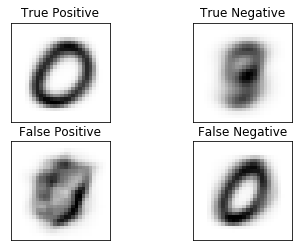

In [8]:
plotter_and_analyser.plot_classified_result(mnist_data_loader.num_train,
                                            trainer.data_loader.list_label_train,
                                           trainer.prediction_result_train,
                                           mnist_data_loader.list_image_train)

In [9]:
plotter_and_analyser.plot_evaluation_table()

,positive,negative,Total
True,4435,51867,56302
False,2210,1488,3698
All,6645,53355,60000


In [10]:
plotter_and_analyser.plot_scores()

Precision    0.667419
Recall       0.748776
dtype: float64

# With test data

In [11]:
test_model_parameters = binary_classifier.model_parameters
prediction_result_test = []
new_test_label = trainer.data_loader.list_label_test
test_image = mnist_data_loader.list_image_test
test_length = mnist_data_loader.num_test

for test in range(test_length):
    x = test_image[:, test]
    if np.sum(x * test_model_parameters) >= 0:
        prediction_result_test.append(1)
    else:
        prediction_result_test.append(-1)

In [12]:
plotter_and_analyser_test = PlotterAndAnalyser(mnist_data_loader)

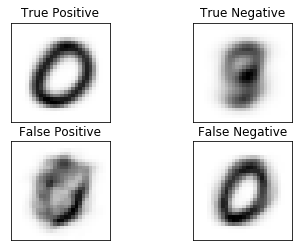

In [13]:
plotter_and_analyser_test.plot_classified_result(test_length,
                                                 new_test_label,
                                                 prediction_result_test,
                                                test_image)

In [14]:
plotter_and_analyser_test.plot_evaluation_table()

,positive,negative,Total
True,750,8680,9430
False,340,230,570
All,1090,8910,10000


In [16]:
plotter_and_analyser_test.plot_scores()

Precision    0.688073
Recall       0.765306
dtype: float64